# Notebook description
This Jupyter notebook analyses the performance of pyCapsid for a range of protein shells

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# Set defaults
#sns.set_theme(style = 'darkgrid')
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Load data
df_data = pd.read_csv('pyCapsid_performance_data.csv')

In [4]:
# Add Memory usage in Megabtyes
conversion = 1.048576 # 1 Mebibyte is 2^20 / 10^6 Megabytes 
df_data['Memory_MB'] = df_data['Memory'].apply(lambda x:x*conversion)

In [5]:
# Data inspection
df_data.head()

,PDB,Capsid,Abbreviation,Residues,MCPs,CPs,Reinforcement,Resolution,T-number,Spring_constant,...,Outliers,CQS,Icos_class,Memory,Runtime,pyCap_runtime,ProDy_runtime,pyCap_memory,ProDy_memory,Memory_MB
0,2e0z,Pyrococcus furiosus VLP,P furio enc,42000,180,180,NaN,3.6,3,0.64,...,NaN,350.0,3 H,1880.0,400.0,182.0,904.0,1340.0,640.0,1971.322880
1,2ft1,Escherichia coli bacteriophage Hong Kong 97 he...,Phage HK97 Head II,115140,420,420,NaN,3.9,7,0.65,...,60.0,4.2,NaN,7700.0,11884.0,NaN,NaN,NaN,NaN,8074.035200
2,3j40,Salmonella anatum bacteriophage epsilon15,Phage epsilon15,187320,420,840,2-fold Axis,4.5,7,17.70,...,NaN,5.9,Rh*,16300.0,24032.0,3940.0,8920.0,1300.0,740.0,17091.788800
3,3j4u,Bordetella baceriophage BPP-1,Phage BPP-1,195240,420,840,2-fold Axis,3.5,7,8.80,...,NaN,8.6,9.33 TD,25620.0,19485.0,NaN,NaN,NaN,NaN,26864.517120
4,3j7v,Escherichia coli bacteriophage T7 procapsid,Phage T7 procap,126720,420,420,NaN,4.6,7,5.70,...,60.0,14.5,NaN,12304.0,13302.0,NaN,NaN,NaN,NaN,12901.679104


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PDB              26 non-null     object 
 1   Capsid           26 non-null     object 
 2   Abbreviation     26 non-null     object 
 3   Residues         26 non-null     int64  
 4   MCPs             26 non-null     int64  
 5   CPs              26 non-null     int64  
 6   Reinforcement    12 non-null     object 
 7   Resolution       26 non-null     float64
 8   T-number         26 non-null     int64  
 9   Spring_constant  25 non-null     float64
 10  Spring_stderr    25 non-null     float64
 11  Spring_R^2       6 non-null      float64
 12  CC_uENM          26 non-null     float64
 13  CC_bGNM          5 non-null      float64
 14  CC_ANM           12 non-null     float64
 15  Clusters         26 non-null     int64  
 16  Outliers         3 non-null      float64
 17  CQS              2

In [7]:
# Set the id column (PDB) column as the data frame's index
df_data.set_index('PDB', inplace=True)
#df_data

In [8]:
# Overall statistical description
df_data.describe()

,Residues,MCPs,CPs,Resolution,T-number,Spring_constant,Spring_stderr,Spring_R^2,CC_uENM,CC_bGNM,...,Clusters,Outliers,CQS,Memory,Runtime,pyCap_runtime,ProDy_runtime,pyCap_memory,ProDy_memory,Memory_MB
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,25.000000,25.000000,6.000000,26.000000,5.000000,...,26.000000,3.0,26.000000,25.000000,25.000000,10.000000,10.000000,6.000000,6.000000,25.000000
mean,2.262185e+05,415.384615,683.076923,3.470000,6.923077,5.729600,0.221760,0.968167,0.517000,0.641200,...,205.230769,60.0,20.553846,22866.260000,26553.880000,1346.500000,3362.200000,4933.333333,2306.666667,23977.011446
std,3.134523e+05,206.402147,496.828093,0.657565,3.440036,5.918578,0.193539,0.010108,0.211278,0.103282,...,158.563630,0.0,67.366135,20343.841162,29674.202517,1460.864451,3159.471151,4479.346679,1972.832144,21332.063590
min,1.590000e+04,60.000000,60.000000,2.000000,1.000000,0.110000,0.004000,0.954000,0.100000,0.540000,...,12.000000,60.0,3.300000,760.000000,120.000000,106.000000,206.000000,1300.000000,640.000000,796.917760
25%,1.073550e+05,285.000000,285.000000,3.215000,4.750000,0.650000,0.060000,0.961250,0.360000,0.560000,...,72.000000,60.0,4.500000,7700.000000,4343.000000,289.000000,985.500000,1612.500000,872.500000,8074.035200
50%,1.839600e+05,420.000000,480.000000,3.400000,7.000000,4.150000,0.170000,0.970000,0.468000,0.640000,...,175.000000,60.0,6.100000,19626.000000,20304.000000,624.500000,2464.000000,4015.000000,1735.000000,20579.352576
75%,2.278500e+05,420.000000,840.000000,3.785000,7.000000,7.400000,0.300000,0.975000,0.673000,0.666000,...,272.000000,60.0,8.350000,38300.000000,32662.000000,1922.250000,5177.250000,5772.500000,2920.000000,40160.460800
max,1.687980e+06,960.000000,1920.000000,5.200000,16.000000,19.700000,0.700000,0.980000,0.875000,0.800000,...,540.000000,60.0,350.000000,84000.000000,128000.000000,3940.000000,8920.000000,13100.000000,5830.000000,88080.384000


## Range of capsids analyzed

Text(0, 0.5, 'Number of residues')

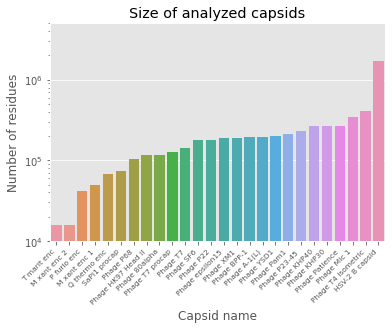

In [9]:
# Plot number of residues for each capsid
data = df_data
sns.barplot(data = df_data, x = 'Abbreviation', y = 'Residues', order = df_data.sort_values('Residues').Abbreviation)
plt.yscale('log')
plt.ylim(1E4,5E6)
plt.xticks(rotation = 45, fontsize = 7.5, ha = 'right')
plt.title('Size of analyzed capsids')
plt.xlabel('Capsid name')
plt.ylabel('Number of residues')

In [10]:
## Descriptive statistics for the number of residues in the capsids
df_data['Residues'].describe()

count    2.600000e+01
mean     2.262185e+05
std      3.134523e+05
min      1.590000e+04
25%      1.073550e+05
50%      1.839600e+05
75%      2.278500e+05
max      1.687980e+06
Name: Residues, dtype: float64

In [11]:
# Pair plot
#sns.pairplot(df_data)

## Memory usage versus protein shell size
The screening of the memory usage as a function of the protein shell size indicated a power law relationship (linear trend when plotting variables in a log-log plot).

Below we first calculate the linear regression model in the log-log space and then plot the data and the model.

In [12]:
# Describe the number of residues and memory usage for the capsids were memory usage was obtained:
print(df_data[df_data['Memory_MB'].notna()].index)
print(df_data.loc[df_data[df_data['Memory_MB'].notna()].index,['Residues','Memory_MB']].describe())

Index(['2e0z', '2ft1', '3j40', '3j4u', '3j7v', '3j7w', '5l35', '5uu5', '5vf3',
       '6b23', '6c21', '6i9e', '6iat', '6j3q', '6nj8', '6xgq', '7dn2', '7eel',
       '7f2p', '7f38', '7kmx', '7kq5', '7s20', '7s21', 'EMD-21123'],
      dtype='object', name='PDB')
            Residues     Memory_MB
count      25.000000     25.000000
mean   167748.000000  23977.011446
std     98761.409467  21332.063590
min     15900.000000    796.917760
25%    104760.000000   8074.035200
50%    180600.000000  20579.352576
75%    212100.000000  40160.460800
max    406860.000000  88080.384000


In [13]:
# Exploratory plots

Text(0, 0.5, 'Memory usage (MB)')

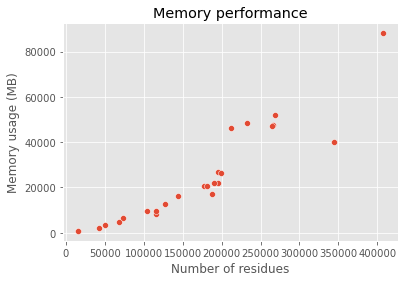

In [14]:
## Scatter in normal space
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')

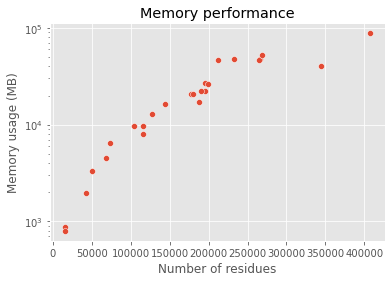

In [15]:
## Scatter plot in log-y space
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')
plt.yscale('log')

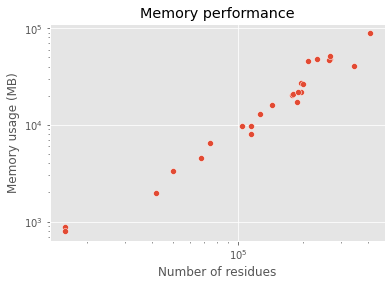

In [16]:
## Scatter plot in log-log space
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')
plt.yscale('log')
plt.xscale('log')

In [17]:
# Statistical model for Memory versus residues

In [18]:
## Check if the Memory value is missing for any of the entries
ID_no_memory = df_data[df_data['Memory_MB'].isnull()].index
print(ID_no_memory)

Index(['5zap'], dtype='object', name='PDB')


In [19]:
## Generate data frame excluding rows missing Memory estimate
df_data_memory_curated = df_data.drop(ID_no_memory)
len(df_data_memory_curated) # Number of valid data points

25

In [20]:
## Analyze regression 
data = df_data_memory_curated
xcol = 'Residues'
ycol = 'Memory_MB'
x = np.log10(data[xcol])
y = np.log10(data[ycol])
#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
model = stats.linregress(x,y)
print(model)

LinregressResult(slope=1.458408919713472, intercept=-3.3126284496332934, rvalue=0.983089144257847, pvalue=1.8471543694987473e-18, stderr=0.056646933424839084, intercept_stderr=0.29049321453557075)


In [21]:
# R^2 coefficient
print(model.rvalue**2)

0.9664642655576259


In [22]:
### Generate points to represent the regression in normal space
slope = model.slope
intercept = model.intercept
x_min = data[xcol].min()
x_max = data[xcol].max()
logx = np.linspace(np.log10(x_min),np.log10(x_max),10)
logy = slope*logx + intercept
x_model = 10**logx
y_model = 10**logy

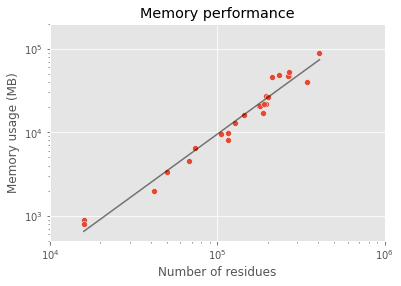

In [23]:
## Plot memory versus number of residues after analysis
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1E4,1E6)
plt.ylim(5E2,2E5)
plt.plot(x_model,y_model,'k', alpha =0.5)

## Runtime versus number of residues

### General check of runtime data

In [24]:
# Missing values
ID_no_memory = df_data[df_data['Runtime'].isnull()].index
print(ID_no_memory)

Index(['5zap'], dtype='object', name='PDB')


In [25]:
# Remove missing values
df_data_curated = df_data.drop(ID_no_memory)

In [26]:
# Description of Runtime
df_data_curated['Runtime'].describe()

count        25.000000
mean      26553.880000
std       29674.202517
min         120.000000
25%        4343.000000
50%       20304.000000
75%       32662.000000
max      128000.000000
Name: Runtime, dtype: float64

In [27]:
# Description in hours
df_data_curated['Runtime'].apply(lambda x:x/(60*60)).describe()

count    25.000000
mean      7.376078
std       8.242834
min       0.033333
25%       1.206389
50%       5.640000
75%       9.072778
max      35.555556
Name: Runtime, dtype: float64

### Exploratory plots

Text(0, 0.5, 'Runtime (sec)')

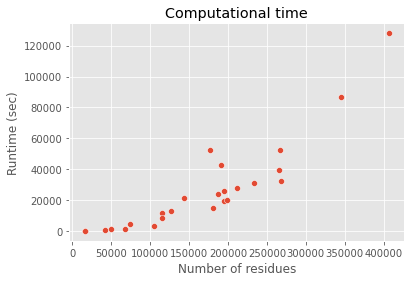

In [28]:
# Scatter plot
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')

**Assessment**
+ Runtime seems to increase with a power law or exponential.
+ A scaling analyis is most likely to lead to a power law.
+ However, let's check first the exponential case by plotting the data in the log-y versus x space.

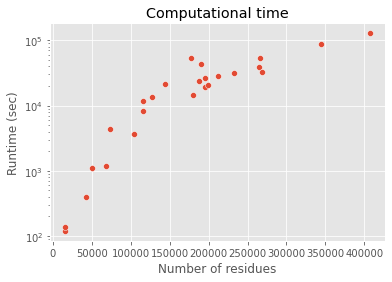

In [29]:
# Scatter plot (log-y versus x)
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')
plt.yscale('log')

** Assessment:**
+ The data tends to flatten. This indicates a non-exponential trend in the original data.

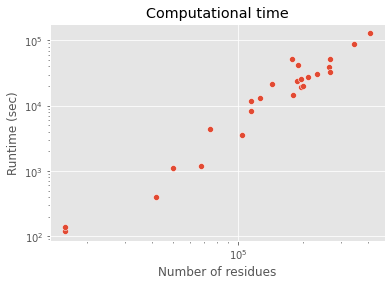

In [30]:
# Scatter plot (log-y versus log-x)
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')
plt.yscale('log')
plt.xscale('log')

**Assessment:**
+ The data displays an approximated linear trend in the log-log space.
+ This implies that the runtime follows a **power law**, which increases as the number of residues is larger.
+ A linear regerssion in the log-log space will yield the parameters.

### Statistical analysis

In [31]:
# Linear regression 
data = df_data_curated
xcol = 'Residues'
ycol = 'Runtime'
x = np.log10(data[xcol])
y = np.log10(data[ycol])
model = stats.linregress(x,y)
print(model)

LinregressResult(slope=2.196376620323567, intercept=-7.223094573131158, rvalue=0.9764397000337123, pvalue=8.102281685746777e-17, stderr=0.10121145253708014, intercept_stderr=0.5190261575998856)


In [32]:
# R^2
(model.rvalue)**2

0.953434487801926

In [33]:
# Generate points to represent the regression in normal space
slope = model.slope
intercept = model.intercept
x_min = data[xcol].min()
x_max = data[xcol].max()
logx = np.linspace(np.log10(x_min),np.log10(x_max),10)
logy = slope*logx + intercept
x_model = 10**logx
y_model = 10**logy

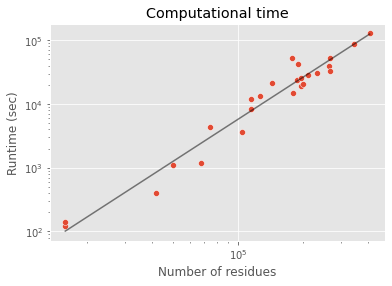

In [34]:
# Log-log scatter plot including the linear regression
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')
plt.yscale('log')
plt.xscale('log')
plt.plot(x_model,y_model,'k', alpha =0.5)

## Accuracy analysis
Each generated coarse-grained model simulation was compared with the experimental model. More specifically, the thermal fluctuations (captured by the B-factors) were compared using the correlation coefficient as a metric. Here we analyze how the correlation coefficient changed as a function of the protein shell size and the resolution of the experimental data. We focus on the results from the unified elastic network model (uENM), which is the default in pyCapsid.

In [35]:
# Correlation coefficient (CC) overall description
df_data['CC_uENM'].describe()

count    26.000000
mean      0.517000
std       0.211278
min       0.100000
25%       0.360000
50%       0.468000
75%       0.673000
max       0.875000
Name: CC_uENM, dtype: float64

### Impact of capsid size

(0.0, 1.0)

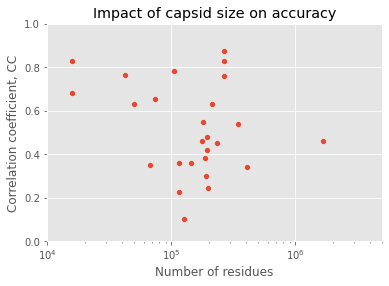

In [36]:
# Plot CC versus number of residues
sns.scatterplot(data = df_data, x = 'Residues', y = 'CC_uENM')
plt.title('Impact of capsid size on accuracy')
plt.xlabel('Number of residues')
plt.ylabel('Correlation coefficient, CC')
plt.xscale('log')
plt.xlim(1E4,5E6)
plt.ylim(0,1)

**Evaluation:**
+ The correlation coefficients seem to be quite scattered across number of residues.
+ If any correlation, it looks like it might be slightly negative, that is, lower CC values for larger capsids.
+ We will analyze the correlation between CC and number of residues to quantify if they are not correlated.

In [37]:
# Spearman's correlation
arr1 = np.array(df_data['Residues'])
arr2 = np.array(df_data['CC_uENM'])
result = stats.spearmanr(arr1,arr2)
print(result)

SpearmanrResult(correlation=-0.08982037111235272, pvalue=0.6625792351169228)


In [38]:
# Pearson's correlation
result = stats.pearsonr(arr1,arr2)
print(result)

(-0.08377179853316177, 0.6841089196641801)


In [39]:
# Pearson's correlation using log-x (logarithm of the number of residues)
result = stats.pearsonr(np.log10(arr1),arr2)
print(result)

(-0.2591829388586489, 0.20105063233221238)


**Evaluation:**
+ The three tests performed indicate that there is no statistical correlation between CC and the number of residues.
+ Thus, **capsid size does not impact the accuracy of pyCapsid**.

### Impact of the empirical resolution of the capsid reconstruction

In [40]:
# Overal description of the capsid resolutions
df_data['Resolution'].describe()

count    26.000000
mean      3.470000
std       0.657565
min       2.000000
25%       3.215000
50%       3.400000
75%       3.785000
max       5.200000
Name: Resolution, dtype: float64

(0.0, 1.0)

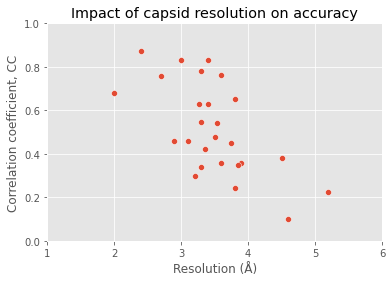

In [41]:
# Plot CC versus capsid resolution
fig = sns.scatterplot(data = df_data, x = 'Resolution', y = 'CC_uENM')
plt.title('Impact of capsid resolution on accuracy')
plt.xlabel('Resolution (Å)')
plt.ylabel('Correlation coefficient, CC')
plt.xlim(1,6)
plt.ylim(0,1)

**Evaluation:**
+ There seems to be a pronounced trend where CC decreases as the resolution worsens (larger values).
+ Let's quantify it with a linear regression analysis.

In [42]:
# Linear regression
x = df_data['Resolution']
y = df_data['CC_uENM']
model = stats.linregress(x,y)
print(model)

LinregressResult(slope=-0.2041610390571519, intercept=1.225438805528317, rvalue=-0.6354160214639316, pvalue=0.00048675913104730313, stderr=0.05064330025534407, intercept_stderr=0.17874044367810663)


In [43]:
# Coefficient of determination (R^2)
R2 = model.rvalue**2
print(R2)

0.4037535203330516


(0.0, 1.0)

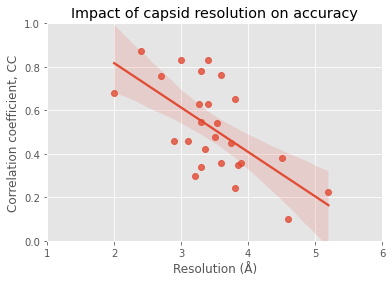

In [44]:
# Plot data including linear regression
sns.regplot(data = df_data, x = x, y = y)
plt.title('Impact of capsid resolution on accuracy')
plt.xlabel('Resolution (Å)')
plt.ylabel('Correlation coefficient, CC')
plt.xlim(1,6)
plt.ylim(0,1)

**Evaluation:**
+ There is a **strong negative correlation between the correlation coefficients as the resolution worsens**.
+ The slope is -0.20±0.05 1/Å (p-value = 0.0005 and R^2 = 0.40).
+ The intercept is 1.22±0.18, that is, **at perfect resolution (0 Å), one would expect pyCapsid to give B-factors perfectly consistent with the empirical results**.

## Benchmark with ProDy

+ To assees the improvement in the analysis of protein shells, we compared the runtime of pyCapsid with the gold standard in the field, ProDy.
+ Given the limitations of ProDy in handling protei shells with multiple chains, the results focus on relatively small capsids.

### Runtime comparison

In [45]:
# Capsids used in the runtime benchmarking
df_data_bench_run = df_data[df_data['pyCap_runtime'].notna()]
#df_data_bench_run
print(df_data_bench_run.index)
print(len(df_data_bench_run))

Index(['2e0z', '3j40', '3j7w', '5uu5', '6b23', '6iat', '6nj8', '7kq5', '7s20',
       '7s21'],
      dtype='object', name='PDB')
10


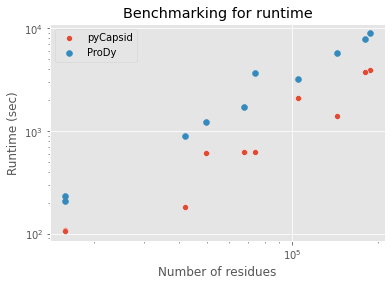

In [46]:
# Plot benchmarking as a function of the number of residues
sns.scatterplot(data = df_data_bench_run, x = 'Residues', y ='pyCap_runtime')
plt.scatter(x = df_data_bench_run['Residues'], y = df_data_bench_run['ProDy_runtime'])
plt.title('Benchmarking for runtime')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')
plt.legend(['pyCapsid','ProDy'])
plt.yscale('log')
plt.xscale('log')
#plt.xlim(10000,80000)
#plt.ylim(-100,4000)

**Assessment:**
+ The ProDy's runtime is systematically larger (slower) than pyCapsid's runtime.
+ The runtime increases similarly for both as a function of the number of residues.
+ Analyze below the the ratio of runtime improvement for pyCapsid.

In [47]:
# Obtain runtime improvement
# Defined as runtime_Prody/runtime_pyCapsid = how much slower is ProDy = how much faster is pyCapsid
df_data_bench_run['Runtime_improvement'] = df_data_bench_run.apply(lambda row: row['ProDy_runtime']/row['pyCap_runtime'], axis = 1)

/var/folders/zj/kj2j_txx7lg33sf1jkzpp97c0000gs/T/ipykernel_1807/193277864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_bench_run['Runtime_improvement'] = df_data_bench_run.apply(lambda row: row['ProDy_runtime']/row['pyCap_runtime'], axis = 1)


In [48]:
#df_data_bench_run

In [49]:
df_data_bench_run[['pyCap_runtime','ProDy_runtime','Runtime_improvement']]

,pyCap_runtime,ProDy_runtime,Runtime_improvement
PDB,,,
2e0z,182.0,904.0,4.967033
3j40,3940.0,8920.0,2.263959
3j7w,1395.0,5690.0,4.078853
5uu5,3776.0,7874.0,2.085275
6b23,625.0,3639.0,5.822400
6iat,2098.0,3216.0,1.532888
6nj8,624.0,1712.0,2.743590
7kq5,109.0,231.0,2.119266
7s20,610.0,1230.0,2.016393


<AxesSubplot:xlabel='Residues', ylabel='Runtime_improvement'>

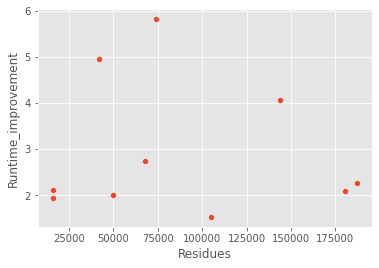

In [50]:
# Plot the runtime improvement based on residues
sns.scatterplot(data = df_data_bench_run, x = 'Residues', y = 'Runtime_improvement')

In [51]:
# Estimate correlation (Spearman's coefficient)
arr1 = np.array(df_data_bench_run['Residues'])
arr2 = np.array(df_data_bench_run['Runtime_improvement'])
result = stats.spearmanr(arr1,arr2)
print(result)

SpearmanrResult(correlation=0.10942299786241164, pvalue=0.7634826463741492)


In [52]:
# Obtain statistical description for the runtime improvement
df_data_bench_run[['Residues','Runtime_improvement']].describe()

,Residues,Runtime_improvement
count,10.000000,10.000000
mean,88206.000000,2.957305
std,63629.668866,1.469584
min,15900.000000,1.532888
25%,43965.000000,2.033614
50%,70830.000000,2.191613
75%,134235.000000,3.745037
max,187320.000000,5.822400


**Assessment:**
+ The runtime improvement of pyCapsid compared to ProDy is independent of the capsid size (Spearman's correlation r = 0.11 with p-value = 0.76)
+ The average runtime improvement is 3.0±1.5(std)
+ 10 capsids were used for benchmarking runtime ranging from 16,000 residues to 190,000 residues.

### Memory usage comparison

In [53]:
# Capsids used in the runtime benchmarking
df_data_bench_mem = df_data[df_data['pyCap_memory'].notna()]
#df_data_bench_run
print(df_data_bench_mem.index)
print(len(df_data_bench_mem))

Index(['2e0z', '3j40', '3j7w', '5uu5', '6b23', '6iat'], dtype='object', name='PDB')
6


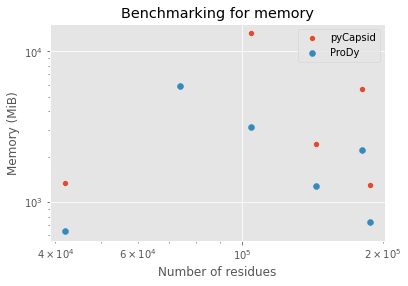

In [54]:
# Plot benchmarking as a function of the number of residues
sns.scatterplot(data = df_data_bench_mem, x = 'Residues', y ='pyCap_memory')
plt.scatter(x = df_data_bench_mem['Residues'], y = df_data_bench_mem['ProDy_memory'])
plt.title('Benchmarking for memory')
plt.xlabel('Number of residues')
plt.ylabel('Memory (MiB)')
plt.legend(['pyCapsid','ProDy'])
plt.yscale('log')
plt.xscale('log')
#plt.xlim(10000,80000)
#plt.ylim(-100,4000)

**Assessment:**
+ ProDy seems to use systematically less memory than PyCapsid.
+ However, the memory usage does not seem to be correlated with the capsid size.

In [55]:
# Display memory usage ratio
# Memory_Prody/Memory_pyCapsid
df_data_bench_mem['Memory_ratio'] = df_data_bench_mem.apply(lambda row: row['ProDy_memory']/row['pyCap_memory'], axis = 1)

/var/folders/zj/kj2j_txx7lg33sf1jkzpp97c0000gs/T/ipykernel_1807/2324845906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_bench_mem['Memory_ratio'] = df_data_bench_mem.apply(lambda row: row['ProDy_memory']/row['pyCap_memory'], axis = 1)


In [56]:
df_data_bench_mem[['pyCap_memory','ProDy_memory','Memory_ratio']]

,pyCap_memory,ProDy_memory,Memory_ratio
PDB,,,
2e0z,1340.0,640.0,0.477612
3j40,1300.0,740.0,0.569231
3j7w,2430.0,1270.0,0.522634
5uu5,5600.0,2200.0,0.392857
6b23,5830.0,5830.0,1.000000
6iat,13100.0,3160.0,0.241221


<AxesSubplot:xlabel='Residues', ylabel='Memory_ratio'>

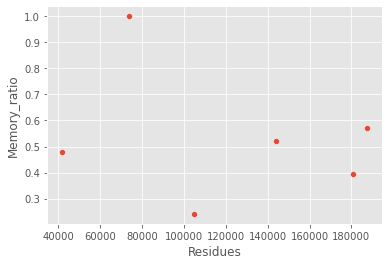

In [57]:
# Plot the memory improvement based on residues
sns.scatterplot(data = df_data_bench_mem, x = 'Residues', y = 'Memory_ratio')

In [58]:
# Estimate correlation (Spearman's coefficient)
arr1 = np.array(df_data_bench_mem['Residues'])
arr2 = np.array(df_data_bench_mem['Memory_ratio'])
result = stats.spearmanr(arr1,arr2)
print(result)

SpearmanrResult(correlation=0.028571428571428574, pvalue=0.9571545189504373)


In [59]:
# Obtain statistical description for the Memory improvement
df_data_bench_mem[['Residues','Memory_ratio']].describe()

,Residues,Memory_ratio
count,6.000000,6.000000
mean,122110.000000,0.533926
std,58644.927146,0.255870
min,42000.000000,0.241221
25%,81630.000000,0.414046
50%,124410.000000,0.500123
75%,171465.000000,0.557582
max,187320.000000,1.000000


**Assessment:** 
+ pyCapsid uses more Memory than ProDy. ProDy memory peak is on average 50±30% smaller (about half).
+ The memory ratio is independent on the capsid size (Spearman's correlation = 0.029 and p-value = 0.96)